カーネル  
https://www.kaggle.com/poonaml/deep-neural-network-keras-way

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [3]:
# データの読み込み
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values (exclude label's column)
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [8]:

# Data Visialization
X_train.shape[0]

42000

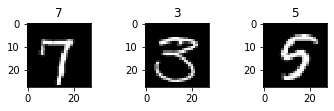

In [9]:
#Convert train datset to (num_images, img_rows, img_cols) format 
#データ配列を（画像数, 各画像の行数, 各画像の列数）の3次元配列に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28)


for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [10]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [11]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [12]:
X_train[0][0].shape

(28, 1)

In [13]:
# Preprocessing the digit images
# Feature Standardization

In [14]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

# この関数はあとで使う

In [15]:
# One Hot encoding of labels.
# A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [16]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
print(y_train.shape)
num_classes

(42000, 10)


10

In [17]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

C:\Users\b6122\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x2c205c28908>,
 <a list of 10 Text xticklabel objects>)

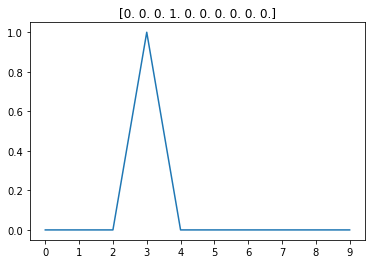

In [18]:
# Lets plot 10th label.

plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

In [19]:
# Oh its 3 !

# Designing Neural Network Architecture

In [20]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [21]:
# Linear Model

from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [22]:
# Lets create a simple model from Keras Sequential layer.

# Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.

# In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) 
#  format. (In theano colour channel comes first)

# Flatten will transform input into 1D array.
# Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in
#  fully connected layer. In the last layer we have to specify output dimensions/classes of the model. 
# Here it's 10, since we have to output 10 different digit labels.

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1))) # 正規化して
model.add(Flatten()) # 1次元ベクトル化して
model.add(Dense(10, activation='softmax')) # 10個(クラス数)の活性化関数softmaxのニューラルネット
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

W0919 16:54:20.982000 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 16:54:20.994688 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 16:54:21.005424 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [23]:
# Compile network
# Before making network ready for training we have to make sure to add below things:

# A loss function: to measure how good the network is

# An optimizer: to update network as it sees more data and reduce loss value

# Metrics: to monitor performance of network


from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])
from keras.preprocessing import image
gen = image.ImageDataGenerator()

W0919 16:54:25.181730 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 16:54:25.186610 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [24]:
# Cross Validation

In [25]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
print(X_train.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

print(X_train.shape)
print(X_val.shape)

batches = gen.flow(X_train, y_train, batch_size=64)
print(batches)
print(batches.n) # 個数

val_batches=gen.flow(X_val, y_val, batch_size=64)
print(val_batches)
print(val_batches.n) # 個数

# flow(https://keras.io/ja/preprocessing/image/)
# flow(x, y=None, batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)
# numpyデータとラベルの配列を受け取り，拡張/正規化したデータのバッチを生成します．

# ---引数---
# x: データ．4次元データである必要があります．グレースケールデータではチャネルを1に，RGBデータではチャネルを3にしてください．
# y: ラベル．
# batch_size: 整数（デフォルト: 32）．
# shuffle: 真理値（デフォルト: True）．
# seed: 整数（デフォルト: None）．
# save_to_dir: Noneまたは文字列（デフォルト: None）．生成された拡張画像を保存するディレクトリを指定できます（行ったことの可視化に有用です）．
# save_prefix: 文字列（デフォルト''）．画像を保存する際にファイル名に付けるプリフィックス（set_to_dirに引数が与えられた時のみ有効）．
# save_format: "png"または"jpeg"（set_to_dirに引数が与えられた時のみ有効）．デフォルトは"png"．
# ---戻り値---
# xが画像データのNumpy配列でyがそれに対応したラベルのNumpy配列である(x, y)から生成されるイテレータです．

(42000, 28, 28, 1)
(37800, 28, 28, 1)
(4200, 28, 28, 1)
37800
4200


In [26]:
history=model.fit_generator(generator=batches, 
                            steps_per_epoch=batches.n, 
                            epochs=3, 
                            validation_data=val_batches, 
                            validation_steps=val_batches.n
                           )

W0919 16:54:29.097443 40456 deprecation.py:323] From C:\Users\b6122\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0919 16:54:29.130628 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
37800/37800 [==============================] - 141s 4ms/step - loss: 0.2401 - acc: 0.9342 - val_loss: 0.3306 - val_acc: 0.9110
Epoch 2/3
37800/37800 [==============================] - 134s 4ms/step - loss: 0.2157 - acc: 0.9417 - val_loss: 0.3473 - val_acc: 0.9126
Epoch 3/3
37800/37800 [==============================] - 145s 4ms/step - loss: 0.2098 - acc: 0.9437 - val_loss: 0.3754 - val_acc: 0.9081


In [27]:
history_dict = history.history


print(history_dict)
history_dict.keys()

{'val_loss': [0.33060419324305246, 0.34730094430535063, 0.3753922852544791], 'val_acc': [0.9109836580641935, 0.9125957854495338, 0.9081028703210926], 'loss': [0.2400393124292184, 0.21573064304786774, 0.2098198896643223], 'acc': [0.9342214545509968, 0.9416920630851415, 0.9437001998631354]}


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

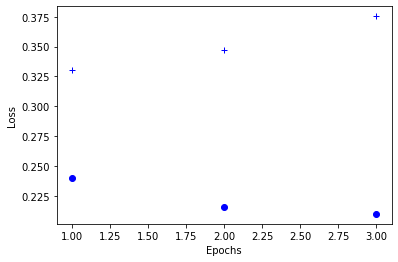

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # つまり[1,2,3]

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [29]:
# Fully Connected Model
# Neurons in a fully connected layer have full connections to all activations in the previous layer, 
# 　as seen in regular Neural Networks. Adding another Dense Layer to model.

In [30]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)), # 正規化して
        Flatten(), # 1次元ベクトルに変えて
        Dense(512, activation='relu'), # 512個の活性化関数reluのニューラルネット←さっきのにはこれがなかった
        Dense(10, activation='softmax') # 10個(クラス数)の活性化関数softmaxのニューラルネット
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [31]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [32]:
history=fc.fit_generator(generator=batches, 
                         steps_per_epoch=batches.n, 
                         epochs=1, 
                         validation_data=val_batches, 
                         validation_steps=val_batches.n
                        )

Epoch 1/1
37800/37800 [==============================] - 622s 16ms/step - loss: 0.1472 - acc: 0.9730 - val_loss: 0.4698 - val_acc: 0.9550


In [35]:
# Convolutional Neural Network
# CNNs are extremely efficient for images.

In [36]:
from keras.layers import Convolution2D, MaxPooling2D
# 中間層なしで初めはやって
# 中間層にNN（ニューラルネット）を用いて2回目は行った
# 次は中間層にCNNを用いて行ってみる。

# https://deepage.net/deep_learning/2016/11/07/convolutional_neural_network.html
def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)), # 正規化して
        Convolution2D(32, #fillter: 32次元（個数）生成する
                      (3,3), # kernel_size: 3×3のサイズの行列のフィルタで畳み込み演算を行う
                      activation='relu' # 活性化関数relu
                     ), 
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(), # 情報を圧縮し、down samplingする　max poolingと呼ばれる手法では、操作は以下のように小領域に対して、最大のものを選択する操作となる。
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [37]:
model= get_cnn_model()
model.optimizer.lr=0.01

W0919 17:30:03.468764 40456 deprecation_wrapper.py:119] From C:\Users\b6122\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [38]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 3314s 88ms/step - loss: 0.0727 - acc: 0.9813 - val_loss: 0.1787 - val_acc: 0.9752


In [55]:
# Data Augmentation
# It is tehnique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.

# Different data aumentation techniques are as follows:

# Cropping
# Rotating
# Scaling
# Translating
# Flipping
# Adding Gaussian noise to input images etc.

In [56]:
gen =ImageDataGenerator(rotation_range=8, 
                        width_shift_range=0.08, 
                        shear_range=0.3,
                        height_shift_range=0.08, 
                        zoom_range=0.08
                       )

batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [57]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, 
                            steps_per_epoch=batches.n, 
                            epochs=1, validation_data=val_batches, 
                            validation_steps=val_batches.n
                           )

Epoch 1/1
37800/37800 [==============================] - 3485s 92ms/step - loss: 9.1005 - acc: 0.4354 - val_loss: 9.4253 - val_acc: 0.4152


In [39]:
# Adding Batch Normalization
# BN helps to fine tune hyperparameters more better and train really deep neural networks.

# https://deepage.net/deep_learning/2016/10/26/batch_normalization.html
# ここが詳しい

In [40]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, 
                            steps_per_epoch=batches.n, 
                            epochs=1, 
                            validation_data=val_batches, 
                            validation_steps=val_batches.n
                           )

Epoch 1/1
23486/37800 [=================>............] - ETA: 27:01 - loss: 0.0273 - acc: 0.9929

In [ ]:
# Submitting Predictions to Kaggle.
# Make sure you use full train dataset here to train model and predict on test set.


model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

In [ ]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)